# The Project :: Image Classification Using CNN

# Table Of Content ::
*****************************************
<

*

* Import Requried Liberaries and frameworks ::

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import warnings as w
import glob    as gb
import os 
import cv2
import keras
import matplotlib.pyplot as plt
import tensorflow as tf


* Set some instruction and rules ::

In [2]:
%matplotlib inline
w.filterwarnings("ignore")
sns.set(rc = {"figure.figsize" : [20 , 20]} , font_scale = 1.9)

* Define The Path of all data

In [3]:
# data Paths ::
Train_Path ="G:/Data Field/Data Science/Repos/Deep_Learning/02- CNN/seg_train/seg_train/"
Test_Path  ="G:/Data Field/Data Science/Repos/Deep_Learning/02- CNN/seg_test/seg_test/"
Pred_Path  ="G:/Data Field/Data Science/Repos/Deep_Learning/02- CNN/seg_pred/seg_pred/"

* Open Folders of all data and get  length of all one of that folders items 

In [4]:
# Train data ::
for folder in os.listdir(Train_Path) :
    Train_files = gb.glob(pathname = Train_Path + folder + "/*.jpg")
    print(f"The Count of Train files :: {len(Train_files)} in folder :: {folder}")

The Count of Train files :: 2191 in folder :: buildings
The Count of Train files :: 2271 in folder :: forest
The Count of Train files :: 2404 in folder :: glacier
The Count of Train files :: 2512 in folder :: mountain
The Count of Train files :: 2274 in folder :: sea
The Count of Train files :: 2382 in folder :: street


In [5]:
# Test_data ::
for folder in os.listdir(Test_Path) :
    Test_filies = gb.glob(pathname = Test_Path + folder + "/*.jpg")
    print(f"The Count of Test files :: {len(Test_filies)} in folder :: {folder}")

The Count of Test files :: 437 in folder :: buildings
The Count of Test files :: 474 in folder :: forest
The Count of Test files :: 553 in folder :: glacier
The Count of Test files :: 525 in folder :: mountain
The Count of Test files :: 510 in folder :: sea
The Count of Test files :: 501 in folder :: street


In [6]:
# Pred_data ::
Pred_files = gb.glob(pathname = Pred_Path + "/*.jpg")
print(f"The Count of Pred files :: {len(Test_filies)}")

The Count of Pred files :: 501


* Checking image ::
    * we have 6 categorical of data image.
    * we need to identify size of data.
* Reading Images ::
    * now it's time to read all images & convert it into arrays.
        * first we'll create a variable s , which refer to size , so we can change it easily.
        * let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training

In [12]:
# create dict to map num of categories with labels
cat_code = {'buildings': 0 ,'forest': 1 , 'glacier' : 2 ,'mountain' : 3 , 'sea' : 4 , 'street' : 5}

In [8]:
# create func to return cate labels
def get_code (n) :
    for x , y in cat_code.items() :
        if n == y :
            return x

In [9]:

s = 100

In [10]:
# Train data behavior ::
Train_size = []
for folder in os.listdir(Train_Path) :
    Train_files = gb.glob(pathname = Train_Path + folder + "/*.jpg")
    for files in Train_files :
        img = plt.imread(files)
        Train_size.append(img.shape)
pd.Series(Train_size).value_counts()
        
    


(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(143, 150, 3)        2
(134, 150, 3)        2
(123, 150, 3)        2
(146, 150, 3)        2
(136, 150, 3)        2
(144, 150, 3)        2
(142, 150, 3)        2
(108, 150, 3)        2
(97, 150, 3)         1
(115, 150, 3)        1
(124, 150, 3)        1
(140, 150, 3)        1
(141, 150, 3)        1
(149, 150, 3)        1
(81, 150, 3)         1
(103, 150, 3)        1
(131, 150, 3)        1
(76, 150, 3)         1
(100, 150, 3)        1
(120, 150, 3)        1
(145, 150, 3)        1
(102, 150, 3)        1
(119, 150, 3)        1
(147, 150, 3)        1
(105, 150, 3)        1
(133, 150, 3)        1
(110, 150, 3)        1
dtype: int64

In [13]:
# Split data into Train and Test and cnvert its size ::
x_train = []
y_train = []
for folder in os.listdir(Train_Path) :
    Train_files = gb.glob(pathname = Train_Path + folder + "/*.jpg")
    for files in Train_files :
        img     = cv2.imread(files)
        img_arr = cv2.resize(img , (s,s))
        x_train.append(list(img_arr))
        y_train.append(cat_code[folder])

In [14]:
# identify how many items in X_tarin
print(f'we have {len(x_train)} items in X_train')

we have 14034 items in X_train


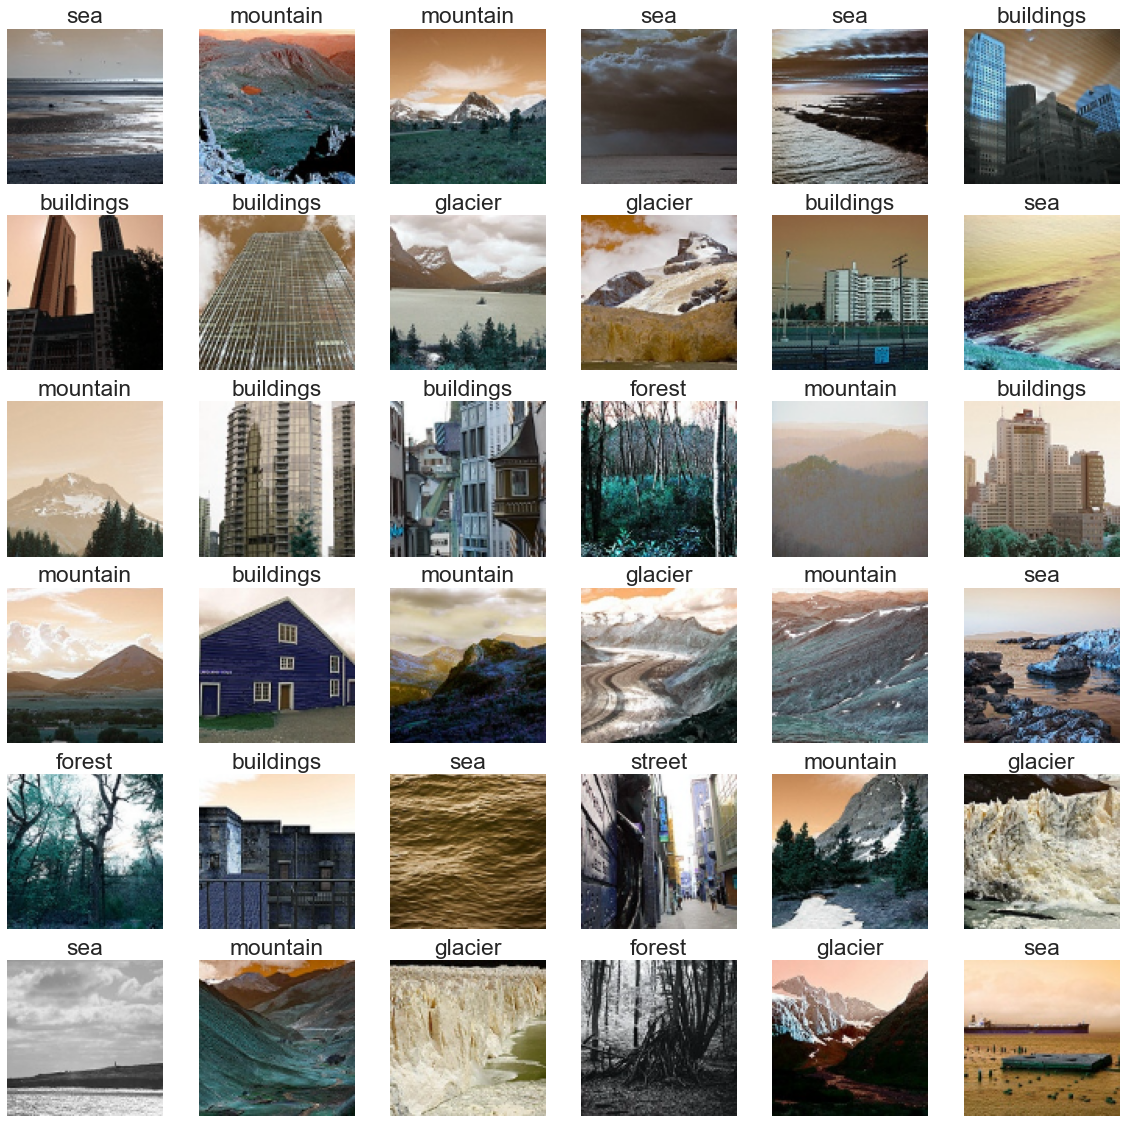

In [15]:
# present random image from Train data and present its label
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])   
    plt.axis('off')
    plt.title(get_code(y_train[i]))

In [16]:
# Test data behavior ::
Test_size = []
for folder in os.listdir(Test_Path) :
    Test_files = gb.glob(pathname = Test_Path + folder + "/*.jpg")
    for files in Test_files :
        img = plt.imread(files)
        Test_size.append(img.shape)
pd.Series(Test_size).value_counts()

(150, 150, 3)    2993
(81, 150, 3)        1
(76, 150, 3)        1
(72, 150, 3)        1
(131, 150, 3)       1
(149, 150, 3)       1
(110, 150, 3)       1
(141, 150, 3)       1
dtype: int64

In [18]:
# Split data into Train and Test and cnvert its size ::
x_test = []
y_test = []
for folder in os.listdir(Test_Path) :
    Test_files = gb.glob(pathname = Test_Path + folder + "/*.jpg")
    for files in Test_files :
        img     = cv2.imread(files)
        img_arr = cv2.resize(img , (s,s))
        x_test.append(list(img_arr))
        y_test.append(cat_code[folder])

In [19]:
# identify how many items in X_tarin
print(f'we have {len(x_test)} items in x_Test')

we have 3000 items in x_Test


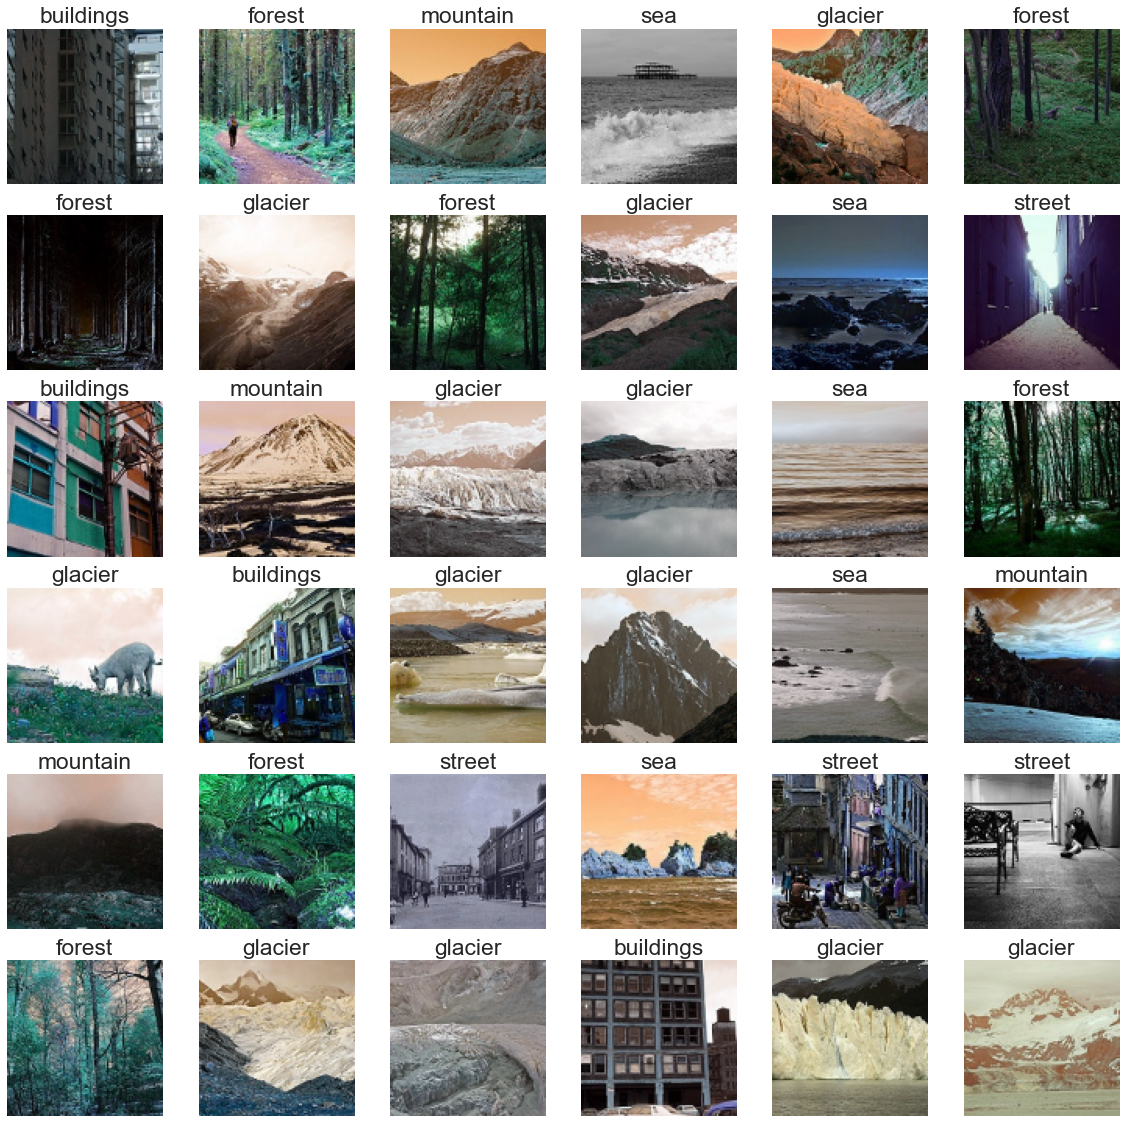

In [20]:
# present random image from Test data and present its label
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])   
    plt.axis('off')
    plt.title(get_code(y_test[i]))

In [21]:
# Pred_data behavior  ::
Pred_files = gb.glob(pathname = Pred_Path + "/*.jpg")


In [22]:
# Pred data ::
x_pred = []
Pred_files = gb.glob(pathname = Pred_Path + "/*.jpg")
for files in Pred_files :
        img     = cv2.imread(files)
        img_arr = cv2.resize(img , (s,s))
        x_pred.append(list(img_arr))


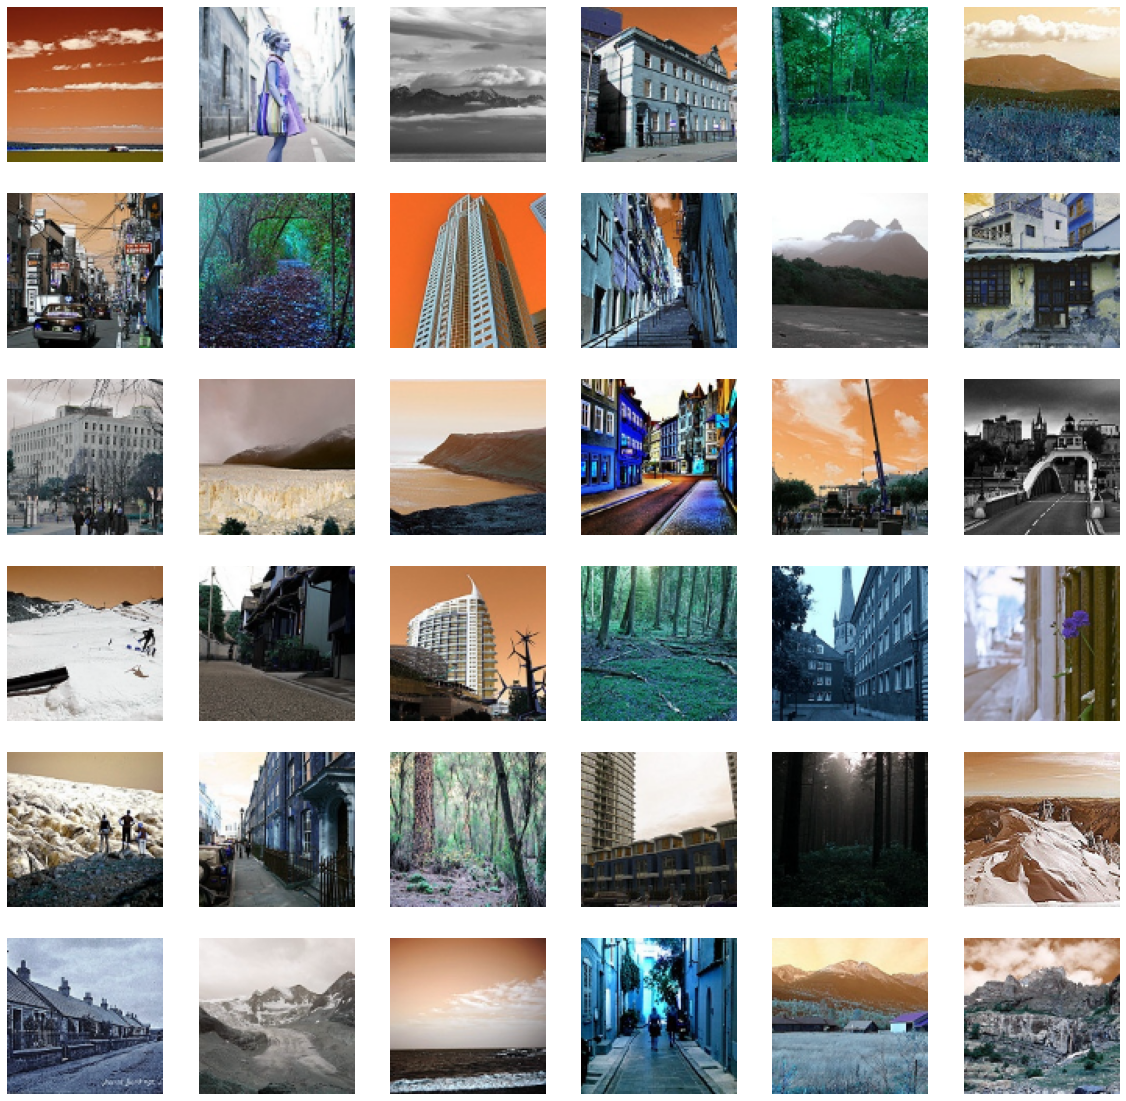

In [24]:
# present random image from pred data 
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_pred[i])   
    plt.axis('off')


* Bulid Model ::

* At First we must convert img into np arrays 

In [27]:
# convert img unto nd arrays ::
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test  = np.array(x_test)
y_test  = np.array(y_test)
x_pred  = np.array(x_pred)

# investigate convertt done ::
print(f'X_train shape   ::  {x_train.shape}')
print(f'X_test shape    ::  {x_test.shape}')
print(f'X_pred shape    ::  {x_pred.shape}')
print(f'y_train shape   ::  {y_train.shape}')
print(f'y_test shape    ::  {y_test.shape}')

X_train shape   ::  (14034, 100, 100, 3)
X_test shape    ::  (3000, 100, 100, 3)
X_pred shape    ::  (7301, 100, 100, 3)
y_train shape   ::  (14034,)
y_test shape    ::  (3000,)


In [29]:
# now to build the CNN model by Keras , using Conv2D layers , MaxPooling & Denses

CNN_Model = keras.models.Sequential([
    
    keras.layers.Conv2D(200 , kernel_size = (3,3) , activation = "relu"  , input_shape = (s,s,3)) ,
    keras.layers.Conv2D(150 , kernel_size = (3,3) , activation = "relu") ,
    keras.layers.MaxPool2D(4,4) ,
    keras.layers.Conv2D(120 , kernel_size = (3,3) , activation = "relu" ) ,
    keras.layers.Conv2D(80 , kernel_size = (3,3) , activation = "relu" )  ,
    keras.layers.Conv2D(50 , kernel_size = (3,3) , activation = "relu" )  ,
    keras.layers.MaxPool2D(4,4) ,
    keras.layers.Flatten() , 
    keras.layers.Dense(120 , activation = "relu") ,
    keras.layers.Dense(100 , activation = "relu") ,
    keras.layers.Dense(50 , activation = "relu") ,
    keras.layers.Dropout(0.2) , 
    keras.layers.Dense(6 , activation = "softmax") ,
                                    ]) 

In [30]:
# now to compile the model , using adam optimizer , & sparse categorical crossentropy loss ::
CNN_Model.compile(optimizer= "adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

In [31]:
# Present Model details ::
print(CNN_Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 50)          0

In [ ]:
# Fit Model ::
CNN_Model.fit(x_train , y_train , epochs=50)


Epoch 1/50
439/439 [==============================] - 1586s 4s/step - loss: 1.8417 - accuracy: 0.3813
Epoch 2/50
439/439 [==============================] - 1684s 4s/step - loss: 1.0001 - accuracy: 0.5986
Epoch 3/50
439/439 [==============================] - 1638s 4s/step - loss: 0.8804 - accuracy: 0.6643
Epoch 4/50
439/439 [==============================] - 23598s 54s/step - loss: 0.7505 - accuracy: 0.7261
Epoch 5/50
439/439 [==============================] - 2435s 6s/step - loss: 0.6897 - accuracy: 0.7510
Epoch 6/50
439/439 [==============================] - 1655s 4s/step - loss: 0.6073 - accuracy: 0.7848
Epoch 7/50
439/439 [==============================] - 6340s 14s/step - loss: 0.5656 - accuracy: 0.8016
Epoch 8/50
439/439 [==============================] - 1714s 4s/step - loss: 0.5208 - accuracy: 0.8096
Epoch 9/50
439/439 [==============================] - 1903s 4s/step - loss: 0.4756 - accuracy: 0.8293
Epoch 10/50
439/439 [==============================] - 1582s 4s/step - loss: 0.

In [ ]:
# Evaluate Model ::
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)
print(f"The Val_Loss :: {ModelLoss}\n******************\nThe Model acc :: {ModelAccuracy}")

In [ ]:
# Prediction ::
y_pred = CNN_Model.predict(x_test)
print(f"The y_pred size :: {y_pred.shape}")

In [ ]:
y_res = CNN_Model.predict(x_pred)
print(f"The y_pred size :: {y_res.shape}")

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_pred[i])    
    plt.axis('off')
    plt.title(get_code(np.argmax(y_res[i])))